# Install necessary libraries

ensure that the following libraries are installed:

- xgboost
- lightgbm
- catboost

# Import necessary libraries to the notebook
- `npmpy` - For mathematical operations
- `pandas` - For data manipulation and analysis
- `matplotlib` and `seaborn` - For data visualization
- `sklearn` - For machine learning algorithms and evaluation metrics
- `xgboost` - For XGBoost model implementation
- `imblearn` - For handling imbalanced datasets using techniques like SMOTE
- `joblib` - For saving and loading machine learning models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report,
)

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE

import joblib

# Setup constants

In [2]:
SEED = 2003

# Load the datasets

In [3]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

# Exploratory Data Analysis (EDA)

In [4]:
train_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [5]:
test_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,...,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,...,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0
2,700002,45,1,61,7.6,6.8,7.0,28.5,0.94,112,...,184,Male,White,Highschool,Low,Never,Employed,0,0,0
3,700003,55,2,81,7.3,7.3,5.0,26.9,0.91,114,...,128,Male,White,Graduate,Middle,Former,Employed,0,0,0
4,700004,77,2,29,7.3,7.6,8.5,22.0,0.83,131,...,133,Male,White,Graduate,Low,Current,Unemployed,0,0,0


In [6]:
train_df.columns

Index(['id', 'age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'gender', 'ethnicity', 'education_level',
       'income_level', 'smoking_status', 'employment_status',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'diagnosed_diabetes'],
      dtype='object')

In [7]:
train_df.shape

(700000, 26)

In [8]:
test_df.shape

(300000, 25)

In [9]:
train_df.dtypes

id                                      int64
age                                     int64
alcohol_consumption_per_week            int64
physical_activity_minutes_per_week      int64
diet_score                            float64
sleep_hours_per_day                   float64
screen_time_hours_per_day             float64
bmi                                   float64
waist_to_hip_ratio                    float64
systolic_bp                             int64
diastolic_bp                            int64
heart_rate                              int64
cholesterol_total                       int64
hdl_cholesterol                         int64
ldl_cholesterol                         int64
triglycerides                           int64
gender                                 object
ethnicity                              object
education_level                        object
income_level                           object
smoking_status                         object
employment_status                 

In [10]:
for col in train_df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {train_df[col].unique()}")

Unique values in gender: ['Female' 'Male' 'Other']
Unique values in ethnicity: ['Hispanic' 'White' 'Asian' 'Black' 'Other']
Unique values in education_level: ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
Unique values in income_level: ['Lower-Middle' 'Upper-Middle' 'Low' 'Middle' 'High']
Unique values in smoking_status: ['Current' 'Never' 'Former']
Unique values in employment_status: ['Employed' 'Retired' 'Student' 'Unemployed']


## Statistical Analysis

In [11]:
target = 'diagnosed_diabetes';
id_col = "id"

numeric_features = [
    "age",
    "alcohol_consumption_per_week",
    "physical_activity_minutes_per_week",
    "diet_score",
    "sleep_hours_per_day",
    "screen_time_hours_per_day",
    "bmi",
    "waist_to_hip_ratio",
    "systolic_bp",
    "diastolic_bp",
    "heart_rate",
    "cholesterol_total",
    "hdl_cholesterol",
    "ldl_cholesterol",
    "triglycerides",
]

categorical_features = [
    "gender",
    "ethnicity",
    "education_level",
    "income_level",
    "smoking_status",
    "employment_status",
    "family_history_diabetes",
    "hypertension_history",
    "cardiovascular_history",
]

In [12]:
train_df.describe()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,0.000000,0.000000,0.000000,1.000000
max,699999.000000,89.000000,9.000000,747.000000,9.900000,9.900000,16.500000,38.400000,1.050000,163.000000,104.000000,101.000000,289.000000,90.000000,205.000000,290.000000,1.000000,1.000000,1.000000,1.000000


## Missing Values Analysis

In [13]:
train_df.isnull().sum()

id                                    0
age                                   0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
smoking_status                        0
employment_status                     0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0


## Target Distribution Analysis

In [14]:
target_counts = train_df[target].value_counts()

print(target_counts)
print(f"Class Imbalance Ratio: {target_counts.max() / target_counts.min()}")

diagnosed_diabetes
1.0    436307
0.0    263693
Name: count, dtype: int64
Class Imbalance Ratio: 1.6546021320247408


C:\Users\adsan\AppData\Local\Temp\ipykernel_30256\548810868.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["No Diabetes (0)", "Diabetes (1)"])


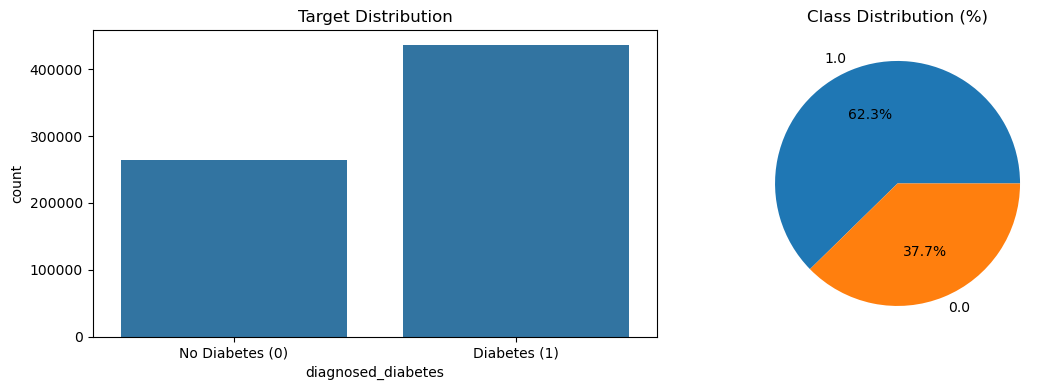

In [15]:
figure, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=train_df, x=target, ax=axes[0])
axes[0].set_title("Target Distribution")
axes[0].set_xticklabels(["No Diabetes (0)", "Diabetes (1)"])

train_df[target].value_counts().plot(kind="pie", autopct="%1.1f%%", ax=axes[1])
axes[1].set_ylabel("")
axes[1].set_title("Class Distribution (%)")
plt.tight_layout()
plt.show()

### Feature Correlations

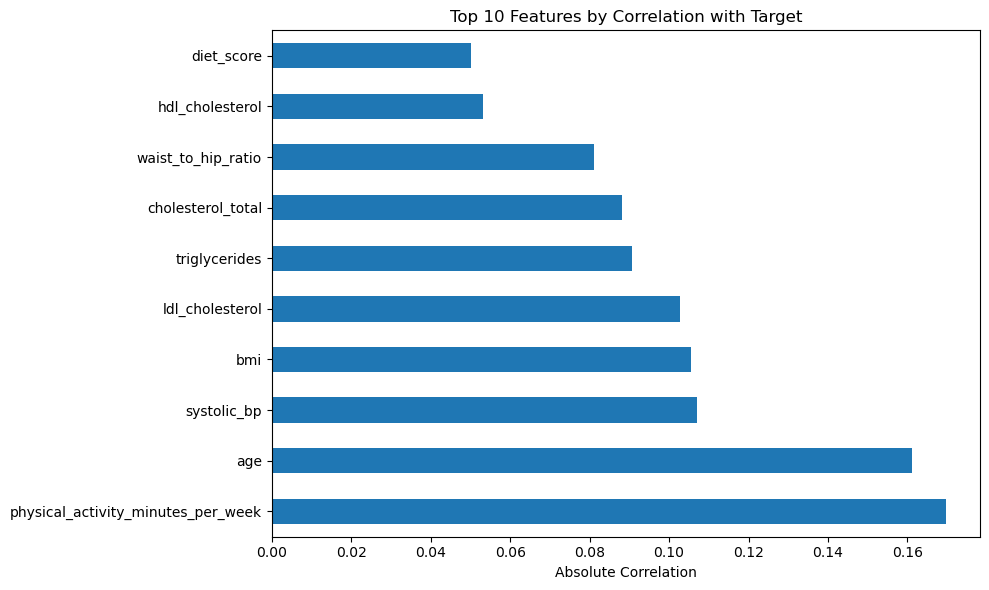

In [16]:
correlation = train_df[numeric_features + [target]].corr()[target].drop(target)
correlation_sorted = correlation.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlation_sorted.head(10).plot(kind="barh")
plt.title("Top 10 Features by Correlation with Target")
plt.xlabel("Absolute Correlation")
plt.tight_layout()
plt.show()

## Preprocessing and Feature Engineering

In [17]:
def create_advanced_features(df):
    df = df.copy()

    df["cholesterol_ratio"] = df["cholesterol_total"] / (df["hdl_cholesterol"] + 1e-6)
    df["ldl_hdl_ratio"] = df["ldl_cholesterol"] / (df["hdl_cholesterol"] + 1e-6)

    df["mean_arterial_pressure"] = (df["systolic_bp"] + 2 * df["diastolic_bp"]) / 3
    df["pulse_pressure"] = df["systolic_bp"] - df["diastolic_bp"]

    df["bmi_category"] = pd.cut(
        df["bmi"], bins=[0, 18.5, 25, 30, 100], labels=[0, 1, 2, 3]
    ).astype(int)

    df["age_group"] = pd.cut(
        df["age"], bins=[0, 30, 40, 50, 60, 100], labels=[0, 1, 2, 3, 4]
    ).astype(int)

    df["lifestyle_score"] = (
        df["diet_score"] * 0.3
        + (df["physical_activity_minutes_per_week"] / 150) * 0.3
        + (df["sleep_hours_per_day"] / 8) * 0.2
        + ((4 - df["alcohol_consumption_per_week"]) / 4) * 0.2
    )

    df["risk_factors_count"] = (
        (df["age"] >= 45).astype(int)
        + (df["bmi"] >= 30).astype(int)
        + (df["family_history_diabetes"] == 1).astype(int)
        + (df["hypertension_history"] == 1).astype(int)
        + (df["smoking_status"].isin(["Current", "Former"])).astype(int)
        + (df["physical_activity_minutes_per_week"] < 150).astype(int)
    )

    df["age_bmi_interaction"] = df["age"] * df["bmi"] / 100

    df["trig_hdl_ratio"] = df["triglycerides"] / (df["hdl_cholesterol"] + 1e-6)

    df["metabolic_syndrome_score"] = (
        ((df["systolic_bp"] >= 130) | (df["diastolic_bp"] >= 85)).astype(int)
        + (df["triglycerides"] >= 150).astype(int)
        + (df["hdl_cholesterol"] < 40).astype(int)
        + (df["bmi"] >= 30).astype(int)
        + (df["family_history_diabetes"] == 1).astype(int)
    )

    df["glucose_risk_proxy"] = (
        df["age"] * 0.3 + df["bmi"] * 0.4 + df["systolic_bp"] / 100 * 0.3
    )

    df["cardiovascular_risk"] = (df["systolic_bp"] - 120) / 20 + (
        df["ldl_cholesterol"] - 100
    ) / 40

    df["age_squared"] = df["age"] ** 2

    df["activity_age_ratio"] = df["physical_activity_minutes_per_week"] / (
        df["age"] + 1
    )

    df["chol_bp_risk"] = (df["cholesterol_total"] / 200) * (df["systolic_bp"] / 120)

    df["protective_factors"] = (
        df["physical_activity_minutes_per_week"] / 150
        + df["diet_score"] / 10
        + (8 - abs(df["sleep_hours_per_day"] - 7.5)) / 8
    )

    df["diet_activity_synergy"] = df["diet_score"] * np.log(
        df["physical_activity_minutes_per_week"] + 1
    )
    return df


train_enhanced = create_advanced_features(train_df)
test_enhanced = create_advanced_features(test_df)
print(f"Dataset with enhanced features: {train_enhanced.shape}")

Dataset with enhanced features: (700000, 44)


In [18]:
ordinal_mappings = {
    "education_level": {
        "No formal": 0,
        "Highschool": 1,
        "Graduate": 2,
        "Postgraduate": 3,
    },
    "income_level": {
        "Low": 0,
        "Lower-Middle": 1,
        "Middle": 2,
        "Upper-Middle": 3,
        "High": 4,
    },
}

for col, mapping in ordinal_mappings.items():
    train_enhanced[col] = train_enhanced[col].map(mapping)
    test_enhanced[col] = test_enhanced[col].map(mapping)

In [19]:
nominal_features = ["gender", "ethnicity", "smoking_status", "employment_status"]

train_encoded = pd.get_dummies(
    train_enhanced, columns=nominal_features, drop_first=True
)
test_encoded = pd.get_dummies(test_enhanced, columns=nominal_features, drop_first=True)

In [20]:
X_train = train_encoded.drop(columns=[id_col, target])
y_train = train_encoded[target]
X_test = test_encoded.drop(columns=[id_col])
test_ids = test_encoded[id_col]

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (700000, 49)
y_train: (700000,)
X_test: (300000, 49)


### Align Train and Test Sets to make sure they have the same columns after encoding

In [21]:
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (700000, 49)
y_train: (700000,)
X_test: (300000, 49)


In [22]:
train_null_count =  X_train.isnull().sum().sum()
test_null_count = X_test.isnull().sum().sum()

print(f"Train Dataset Null Values: {train_null_count}")
print(f"Test Dataset Null Values: {test_null_count}")

Train Dataset Null Values: 0
Test Dataset Null Values: 0


### Scale features using various scalers

In [23]:
robust_scaler = RobustScaler()
std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

scaled_dfs = {
    "RobustScalerTrain": pd.DataFrame(
        robust_scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index,
    ),
    "StandardScalerTrain": pd.DataFrame(
        std_scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index,
    ),
    "MinMaxScalerTrain": pd.DataFrame(
        minmax_scaler.fit_transform(X_train),
        columns=X_train.columns,
        index=X_train.index,
    ),
    "RobustScalerTest": pd.DataFrame(
        robust_scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index,
    ),
    "StandardScalerTest": pd.DataFrame(
        std_scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index,
    ),
    "MinMaxScalerTest": pd.DataFrame(
        minmax_scaler.transform(X_test),
        columns=X_test.columns,
        index=X_test.index,
    ),
}

for name, df in scaled_dfs.items():
    null_count = df.isnull().sum().sum()
    print(f"{name} Null Values: {null_count}")

X_train_scaled = scaled_dfs["StandardScalerTrain"]
X_test_scaled = scaled_dfs["StandardScalerTest"]
# X_train_scaled = scaled_dfs["RobustScalerTrain"]
# X_test_scaled = scaled_dfs["RobustScalerTest"]
# X_train_scaled = scaled_dfs["MinMaxScalerTrain"]
# X_test_scaled = scaled_dfs["MinMaxScalerTest"]

RobustScalerTrain Null Values: 0
StandardScalerTrain Null Values: 0
MinMaxScalerTrain Null Values: 0
RobustScalerTest Null Values: 0
StandardScalerTest Null Values: 0
MinMaxScalerTest Null Values: 0


### Split data, then handle class imbalance

In [24]:
# Split BEFORE SMOTE so validation set contains only real samples
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train_scaled,
    y_train,
    test_size=0.15,
    stratify=y_train,
    random_state=SEED,
)

print(f"Training set: {X_train_split.shape}")
print(f"Validation set: {X_val.shape}")


Training set: (595000, 49)
Validation set: (105000, 49)


### Apply SMOTE only to the training fold

In [25]:
print("Before SMOTE:")
print(y_train_split.value_counts())

smote = SMOTE(random_state=SEED, sampling_strategy=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_split, y_train_split)

print("\nAfter SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Before SMOTE:
diagnosed_diabetes
1.0    370861
0.0    224139
Name: count, dtype: int64

After SMOTE:
diagnosed_diabetes
1.0    370861
0.0    370861
Name: count, dtype: int64


In [26]:
# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train_balanced == 0).sum() / (y_train_balanced == 1).sum()
print(f"\nScale pos weight: {scale_pos_weight:.3f}")


Scale pos weight: 1.000


In [27]:
def calculate_performance(name, model, x_train, x_test, y_train, y_test):
    predictions = model.predict(x_test)

    probabilities = model.predict_proba(x_test)[:, 1]
    auc = roc_auc_score(y_test, probabilities)
    acc = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print(f"\n{name} Performance:")
    print("Accuracy: ", acc * 100)
    print("Precision: ", precision * 100)
    print("Recall: ", recall * 100)
    print("F1: ", f1 * 100)
    print(f"ROC-AUC: {auc:.4f}")

    return {
        "auc": auc,
        "probabilities": probabilities,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

In [28]:
xgb_model = XGBClassifier(
    max_depth=7,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=SEED,
    eval_metric="auc",
    verbosity=0,
)

xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_data = calculate_performance("XGBoost", xgb_model, X_train_balanced, X_val, y_train_balanced, y_val)


XGBoost Performance:
Accuracy:  68.14666666666666
Precision:  70.86539213896351
Recall:  83.0318124866302
F1:  76.46769109535066
ROC-AUC: 0.7214


In [29]:
lgbm_model = LGBMClassifier(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=500,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=SEED,
    verbose=-1,
)

lgbm_model.fit(X_train_balanced, y_train_balanced)
lgbm_data = calculate_performance("LGBM", lgbm_model, X_train_balanced, X_val, y_train_balanced, y_val)



LGBM Performance:
Accuracy:  68.10190476190476
Precision:  70.56045299530275
Recall:  83.77746539131498
F1:  76.6030275722838
ROC-AUC: 0.7218


In [30]:
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    scale_pos_weight=scale_pos_weight,
    random_seed=SEED,
    verbose=0,
)

catboost_model.fit(X_train_balanced, y_train_balanced)
ct_data = calculate_performance("CatBoost", catboost_model, X_train_balanced, X_val, y_train_balanced, y_val)



CatBoost Performance:
Accuracy:  67.82000000000001
Precision:  70.22785651301581
Recall:  83.96846254927726
F1:  76.48593916365685
ROC-AUC: 0.7177


In [31]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    class_weight="balanced",
    random_state=SEED,
    n_jobs=-1,
)

rf_model.fit(X_train_balanced, y_train_balanced)
rf_data = calculate_performance("Random Forest", rf_model, X_train_balanced, X_val, y_train_balanced, y_val)



Random Forest Performance:
Accuracy:  64.58666666666667
Precision:  73.54774204299284
Recall:  67.43880451058888
F1:  70.36092335161331
ROC-AUC: 0.6967


### Calculate weights based on performance of each model

In [32]:
xgb_auc = xgb_data['auc']
lgbm_auc = lgbm_data['auc']
ct_auc = ct_data['auc']
rf_auc = rf_data['auc']

weights = np.array([xgb_auc, lgbm_auc, ct_auc, rf_auc])
normalized_weights = weights / weights.sum()

print("Model weights:")
for name, weight in zip(
    ["XGBoost", "LightGBM", "CatBoost", "RandomForest"], normalized_weights
):
    print(f"  {name}: {weight:.4f}")

Model weights:
  XGBoost: 0.2525
  LightGBM: 0.2526
  CatBoost: 0.2511
  RandomForest: 0.2438


### Create ensemble predictions using weighted average


In [33]:
def calculate_ensemble_predict_probability(X):
    xgb_predictions = xgb_model.predict_proba(X)[:, 1]
    lgbm_predictions = lgbm_model.predict_proba(X)[:, 1]
    catboost_predictions = catboost_model.predict_proba(X)[:, 1]
    rf_predictions = rf_model.predict_proba(X)[:, 1]

    # Weighted average
    ensemble_predictions = (
        normalized_weights[0] * xgb_predictions
        + normalized_weights[1] * lgbm_predictions
        + normalized_weights[2] * catboost_predictions
        + normalized_weights[3] * rf_predictions
    )
    return ensemble_predictions

ensemble_pred_probability = calculate_ensemble_predict_probability(X_val)
ensemble_auc = roc_auc_score(y_val, ensemble_pred_probability)

print(f"Ensemble Validation ROC-AUC Score: {ensemble_auc:.4f} ⭐")

Ensemble Validation ROC-AUC Score: 0.7186 ⭐


### Export Models and Artifacts for Production Use

In [34]:
import joblib
import os

models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

joblib.dump(xgb_model, f"{models_dir}/xgb_model.pkl")
joblib.dump(lgbm_model, f"{models_dir}/lgbm_model.pkl")
joblib.dump(catboost_model, f"{models_dir}/catboost_model.pkl")
joblib.dump(rf_model, f"{models_dir}/rf_model.pkl")

joblib.dump(std_scaler, f"{models_dir}/scaler.pkl")

ensemble_data = {
    'weights': normalized_weights,
    'model_names': ["XGBoost", "LightGBM", "CatBoost", "RandomForest"],
    'ensemble_auc': ensemble_auc
}
joblib.dump(ensemble_data, f"{models_dir}/ensemble_weights.pkl")

feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, f"{models_dir}/feature_columns.pkl")

joblib.dump(ordinal_mappings, f"{models_dir}/ordinal_mappings.pkl")

joblib.dump(nominal_features, f"{models_dir}/nominal_features.pkl")

['../models/nominal_features.pkl']

# Evaluate Ensemble Model Performance

In [35]:
ensemble_pred = (ensemble_pred_probability >= 0.5).astype(int)

accuracy = accuracy_score(y_val, ensemble_pred)
precision = precision_score(y_val, ensemble_pred)
recall = recall_score(y_val, ensemble_pred)
f1 = f1_score(y_val, ensemble_pred)

print("\nEnsemble Model Performance:")
print(f"  Accuracy:  {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")
print(f"  ROC-AUC:   {ensemble_auc:.4f}")

cm = confusion_matrix(y_val, ensemble_pred)
tn, fp, fn, tp = cm.ravel()

print(f"\n📋 Confusion Matrix:")
print(f"  True Negatives:  {tn:,}")
print(f"  False Positives: {fp:,}")
print(f"  False Negatives: {fn:,} (missed diagnoses)")
print(f"  True Positives:  {tp:,}")



Ensemble Model Performance:
  Accuracy:  0.6789
  Precision: 0.7129
  Recall:    0.8120
  F1-Score:  0.7592
  ROC-AUC:   0.7186

📋 Confusion Matrix:
  True Negatives:  18,149
  False Positives: 21,405
  False Negatives: 12,307 (missed diagnoses)
  True Positives:  53,139


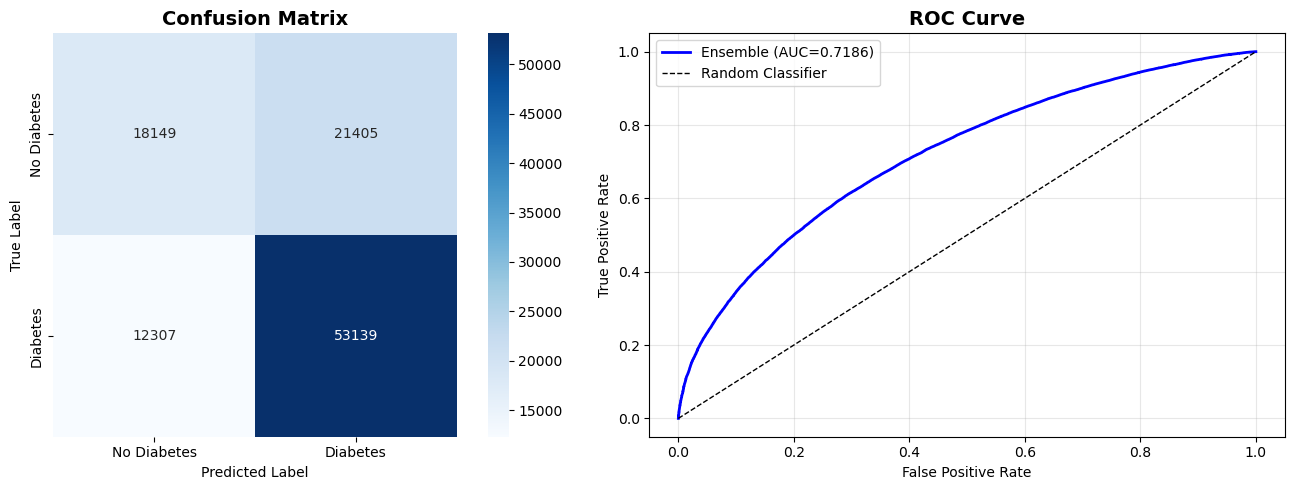


Top 15 Important Features
                               feature  importance
17             family_history_diabetes    0.185968
30            metabolic_syndrome_score    0.099697
1         alcohol_consumption_per_week    0.095373
25                           age_group    0.091084
16                        income_level    0.087881
15                     education_level    0.070825
27                  risk_factors_count    0.064386
24                        bmi_category    0.047513
34                  activity_age_ratio    0.031378
38                         gender_Male    0.028196
7                   waist_to_hip_ratio    0.022951
10                          heart_rate    0.011478
2   physical_activity_minutes_per_week    0.011072
9                         diastolic_bp    0.010490
12                     hdl_cholesterol    0.010197


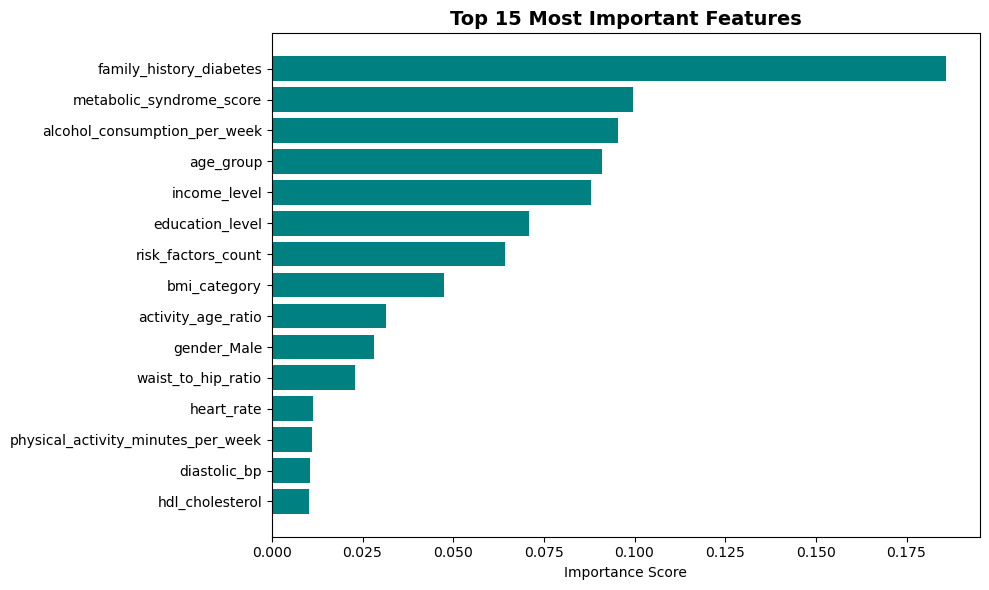

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0], square=True)
axes[0].set_title("Confusion Matrix", fontsize=14, fontweight="bold")
axes[0].set_ylabel("True Label")
axes[0].set_xlabel("Predicted Label")
axes[0].set_xticklabels(["No Diabetes", "Diabetes"])
axes[0].set_yticklabels(["No Diabetes", "Diabetes"])

fpr, tpr, _ = roc_curve(y_val, ensemble_pred_probability)
axes[1].plot(fpr, tpr, "b-", linewidth=2, label=f"Ensemble (AUC={ensemble_auc:.4f})")
axes[1].plot([0, 1], [0, 1], "k--", linewidth=1, label="Random Classifier")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve", fontsize=14, fontweight="bold")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../figures/model_evaluation.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nTop 15 Important Features")
feature_importance = (
    pd.DataFrame(
        {"feature": X_train.columns, "importance": xgb_model.feature_importances_}
    )
    .sort_values("importance", ascending=False)
    .head(15)
)

print(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance["importance"], color="teal")
plt.yticks(range(len(feature_importance)), feature_importance["feature"])
plt.xlabel("Importance Score")
plt.title("Top 15 Most Important Features", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../figures/feature_importance.png", dpi=300, bbox_inches="tight")
plt.show()

# Generate predictions on test dataset using ensemble model

In [37]:
test_predictions_proba = calculate_ensemble_predict_probability(X_test_scaled)

submission = pd.DataFrame(
    {"id": test_ids, "diagnosed_diabetes": test_predictions_proba}
)

# Save submission
submission.to_csv(
    "../out/ensemble_enhanced_features_smote_tuning_fixed_splitting_3.csv", index=False
)